In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler , normalize
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn import metrics
import scipy.cluster.hierarchy as shc

In [2]:
data = pd.read_csv("CC_GENERAL.csv")
data

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [3]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
""" Data Preprocessing """
data["CREDIT_LIMIT"]=data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mean())
data["MINIMUM_PAYMENTS"]=data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean())
data=data.drop("CUST_ID",axis=1)


In [5]:
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.612411   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8950.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2330.588021          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        170.857654          0.000000    12.000000  
50%      856.901546        335.628312          0.000000    12.000000  
75%     1901.134317        864.206542          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

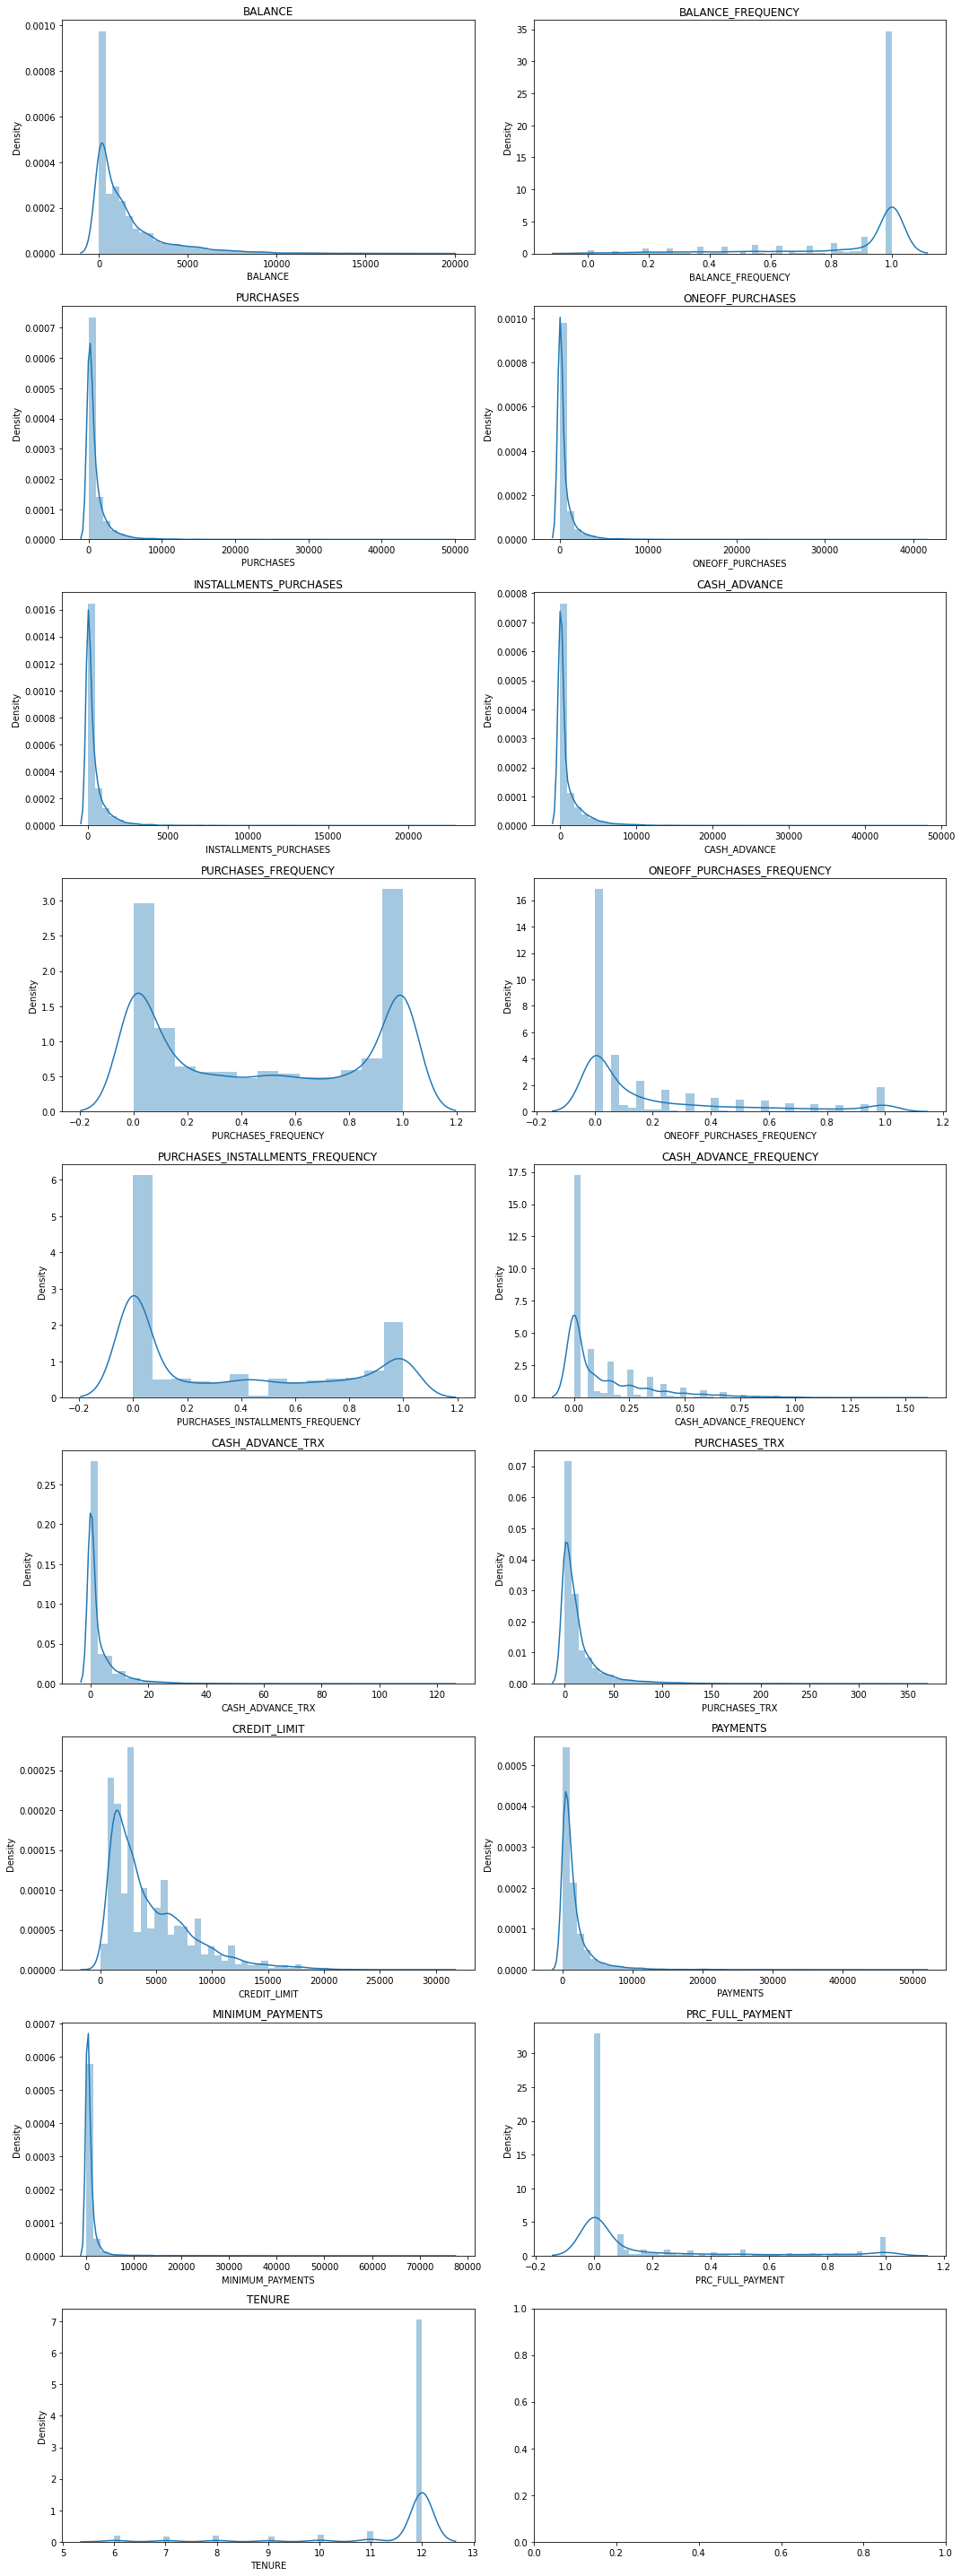

In [6]:
"Data Visulaization "
def simple_multiplot(data,ncols,plottype):
    nrows=int(data.shape[1]/ncols)+1
    cols=data.columns
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=False)
    fig.set_figheight(ncols*20)
    fig.set_figwidth(15)
    for f in range(data.shape[1]):
        plt.subplot(nrows,ncols,f+1)
        plottype(data[cols[f]])
        plt.title(cols[f])
    plt.tight_layout()
    plt.show()
num_feats=data.columns
simple_multiplot(data[num_feats],2,sns.distplot)


Text(0.5, 1.0, 'Correlation Matrix')

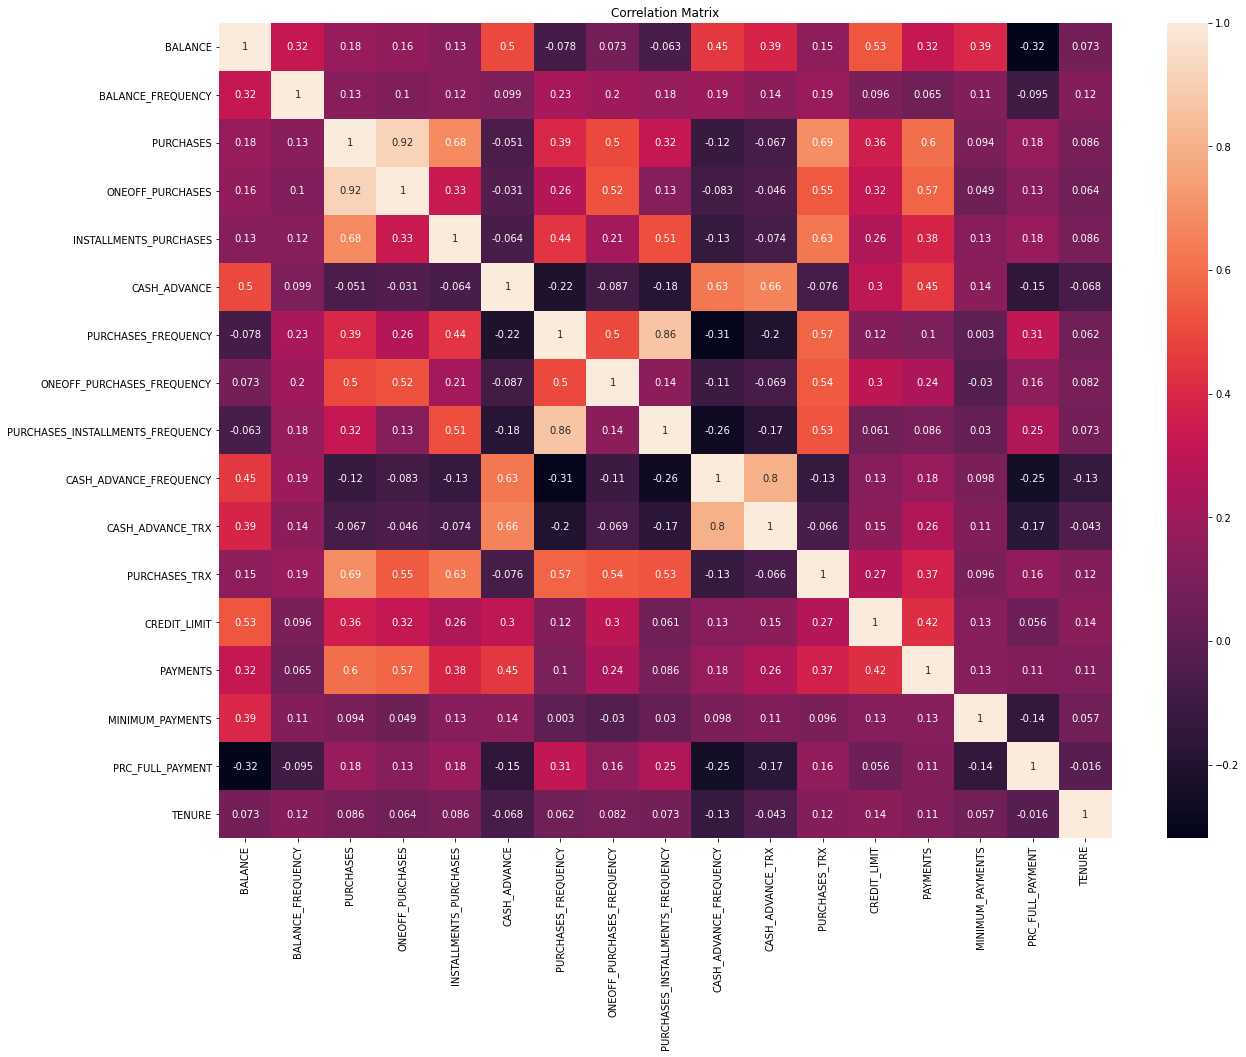

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

plt.title('Correlation Matrix')

In [8]:
X = data[["PAYMENTS", "BALANCE"]]
X = X.values

In [9]:
"Hierarchical clustering"
#identify the inherent groupings using AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
clust_labels=model.fit_predict(X)
agglomerative=pd.DataFrame(clust_labels)
agglomerative

0
0     1
1     1
2     1
3     1
4     1
...  ..
8945  1
8946  1
8947  1
8948  1
8949  1

[8950 rows x 1 columns]

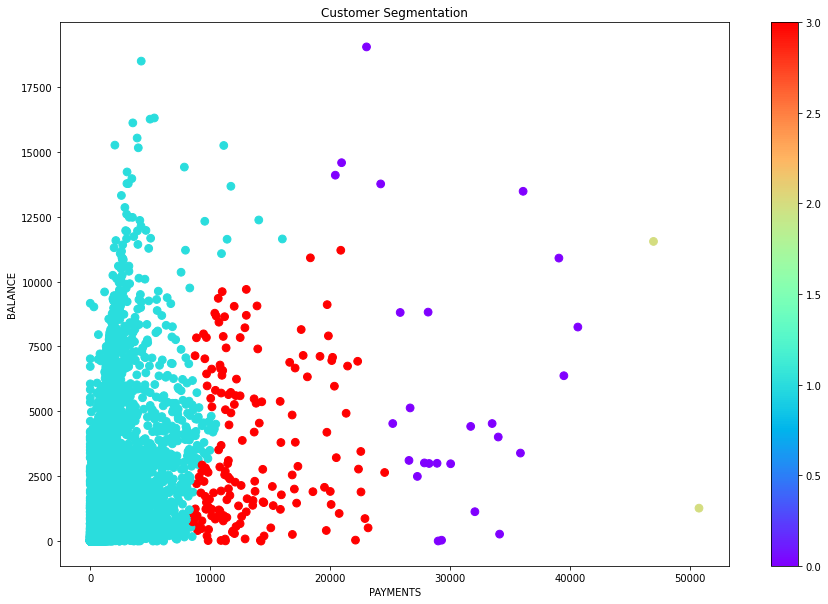

In [10]:
#Agglomerative cluster plot
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(111)
scatter=ax.scatter(X[:,0],X[:,1],c=agglomerative,s=50 ,cmap='rainbow')
ax.set_title("Customer Segmentation")
ax.set_xlabel("PAYMENTS")
ax.set_ylabel("BALANCE")
plt.colorbar(scatter)

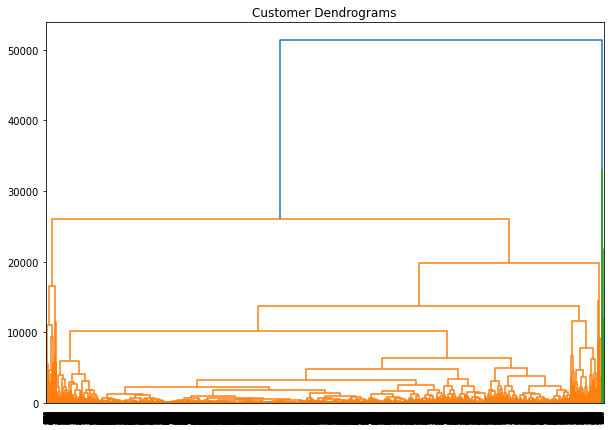

In [11]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(X,method="complete"))

In [13]:
"Kmeans clustering"
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=4, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(X)
labels =kmeans.labels_
centroids = kmeans.cluster_centers_
kmeans.predict(X)

array([1, 2, 1, ..., 1, 1, 1])

In [14]:
"Getting the best value of K"
#K-best Value
Sum_of_squared_distances=[]
K=range(1,10)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
print(Sum_of_squared_distances)

[113779099470.41907, 68705511985.854385, 44772734046.87852, 30803816552.27673, 24402181266.701664, 19742222316.143364, 16955080591.583038, 14605565210.084158, 12707173177.114744]


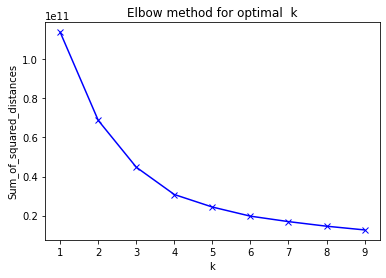

'the optimal K value is 3 as shown in the above graph'

In [19]:
#The Elbow method code:
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method for optimal  k')
plt.show()
"the optimal K value is 3 as shown in the above graph"

'The clustering results with Kmeans is more accurate than the Hierarchicalclustering as the below graphs shows '

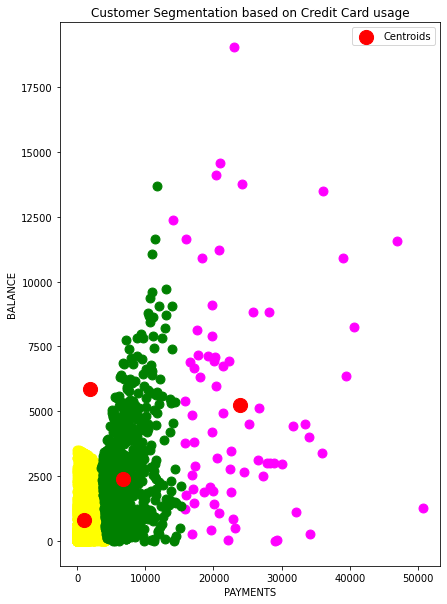

In [21]:
fig= plt.figure(figsize=(15,10))
ax=fig.add_subplot(122)
ax.scatter(X[:,0][kmeans.labels_ == 0],          
            X[:,1][kmeans.labels_ == 0],s=80,c='magenta')
ax.scatter(X[:,0][kmeans.labels_ == 1],
           X[:,1][kmeans.labels_ == 1],s=80,c='yellow')
ax.scatter(X[:,0][kmeans.labels_== 2],
           X[:,1][kmeans.labels_ == 2],s=80,c='green')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label = 'Centroids')
ax.set_title('Customer Segmentation based on Credit Card usage')
ax.set_xlabel('PAYMENTS')
ax.set_ylabel('BALANCE')
ax.legend()
"The clustering results with Kmeans is more accurate than the Hierarchicalclustering as the below graphs shows "